In [11]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
  
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 110856 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [75]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
#!ls drive/flipkart

In [0]:
from os import listdir
from os.path import isfile, join
import pickle
from pathlib import Path

import numpy as np
import pandas as pd
import cv2 
import matplotlib.pyplot as plt

In [0]:
base=Path('drive/flipkart')

In [0]:
#mypath = base/'train'
#paths_tr = [f for f in listdir(mypath) if isfile(join(mypath, f))]
#paths_tr[1]


In [0]:
#mypath= base/'test'
#paths_tst= [f for f in listdir(mypath) if isfile(join(mypath, f))]
#paths_tst[1]

In [0]:
#with open(base/"train_path", "wb") as fp: 
#  pickle.dump(paths_tr, fp)

In [0]:
with open(base/"train_path", "rb") as fp: 
  pat_tr=pickle.load( fp)

In [0]:
train_csv=pd.read_csv(base/'training.csv')

In [81]:
train_csv.head()

,image_name,x1,x2,y1,y2
0,JPEG_20160706_121146_1000145715002.png,115,495,143,325
1,JPEG_20161119_174038_1000690577600.png,23,457,61,409
2,147444927651111470309333776-Roadster-Men-Casua...,37,601,13,470
3,147772332675720161028_161611.png,27,602,162,385
4,1473315333651DeeplearnS11638.png,60,586,174,325


In [0]:
#train_csv[train_csv.columns[1:]]
#list(train_csv[train_csv.columns[1:]])

#label dictionary 
labels=train_csv.set_index('image_name').T.to_dict('list')

In [0]:
def preprocess_image(img):
  w,h = 224, 224 
  
  img = cv2.resize(img, (w,h))
  img = img/255. 
  
  return img 

In [0]:

def image_generator(input_ids, batch_size = 32):
  
  while True:
    batch_paths = np.random.choice(a= input_ids, size = batch_size)
    
    batch_input = []
    batch_output = []
    
    for input_id in batch_paths:
      input = cv2.imread(join(base/'train', input_id))
      output = labels[input_id]
      
      input = preprocess_image(input)
      
      batch_input += [input]
      batch_output += [output]
   
    batch_x = np.array(batch_input)
    batch_y = np.array(batch_output)
    
    yield (batch_x, batch_y)

In [0]:
train_gen=image_generator(pat_tr,32)

In [89]:
x, y = next(train_gen)

print(x.shape)
print(y.shape)

(32, 224, 224, 3)
(32, 4)


In [93]:
print(y[1])

[161 478 111 366]


In [0]:
def show_overlap(img_id):
  
  im=cv2.imread(join(base/'train', img_id))
  output = labels[img_id]
  x1,y1=output[0],output[2]
  x2,y2=output[1],output[3]
  cv2.rectangle(im, (x1,y1), (x2,y2),(255,0,0) , thickness=2, lineType=8, shift=0) 
  plt.imshow(im)
  

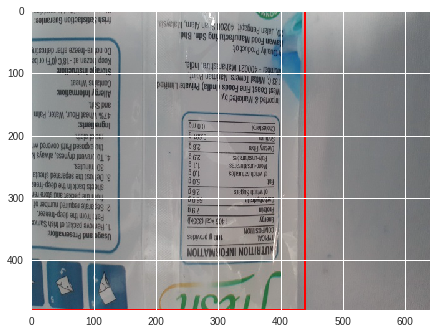

In [123]:
show_overlap(pat_tr[458])

14000

'JPEG_20161210_124607_1000292539937.png'